## Ajuste de margen

* Entre mayor sea el valor de C a la hora de crear una SVM, mayor sera el margen, y por lo tanto existira la posibilidad de que datos queden dentro del margen del vector de soporte 
* No hay una forma de calcular el valor de C, pero podemos hacer uso de la validacion cruzada para encontrar el modelo mas optimo

In [1]:
from sklearn.datasets.samples_generator import make_circles, make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [5]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

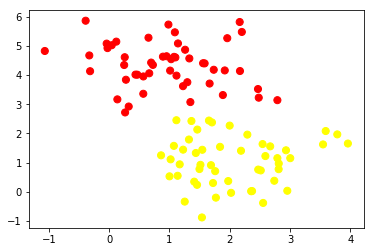

In [3]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=.8)

plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

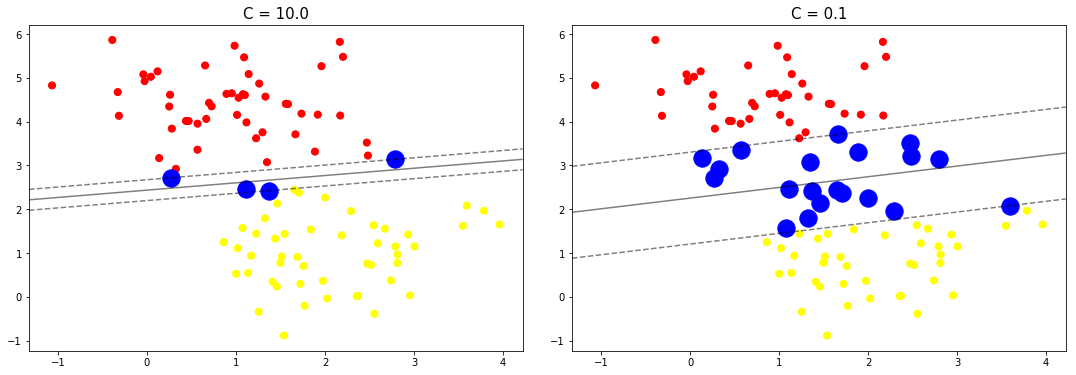

In [6]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)